   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

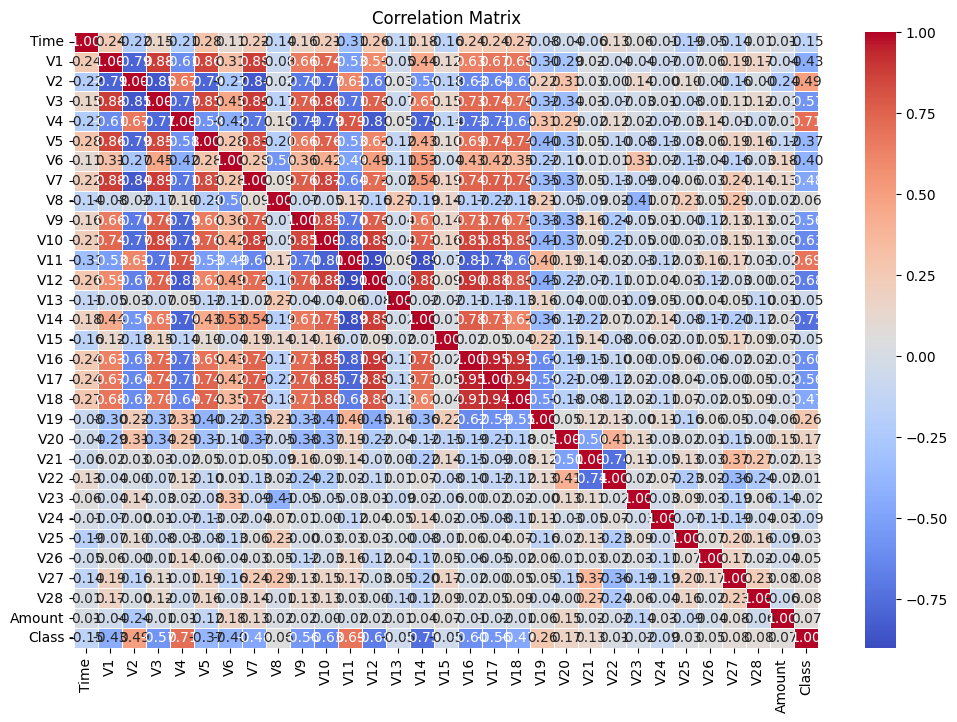

Korelasyonu yüksek değişkenler kaldırıldı ve yeni dosya kaydedildi: cleaned_fraud_data.csv


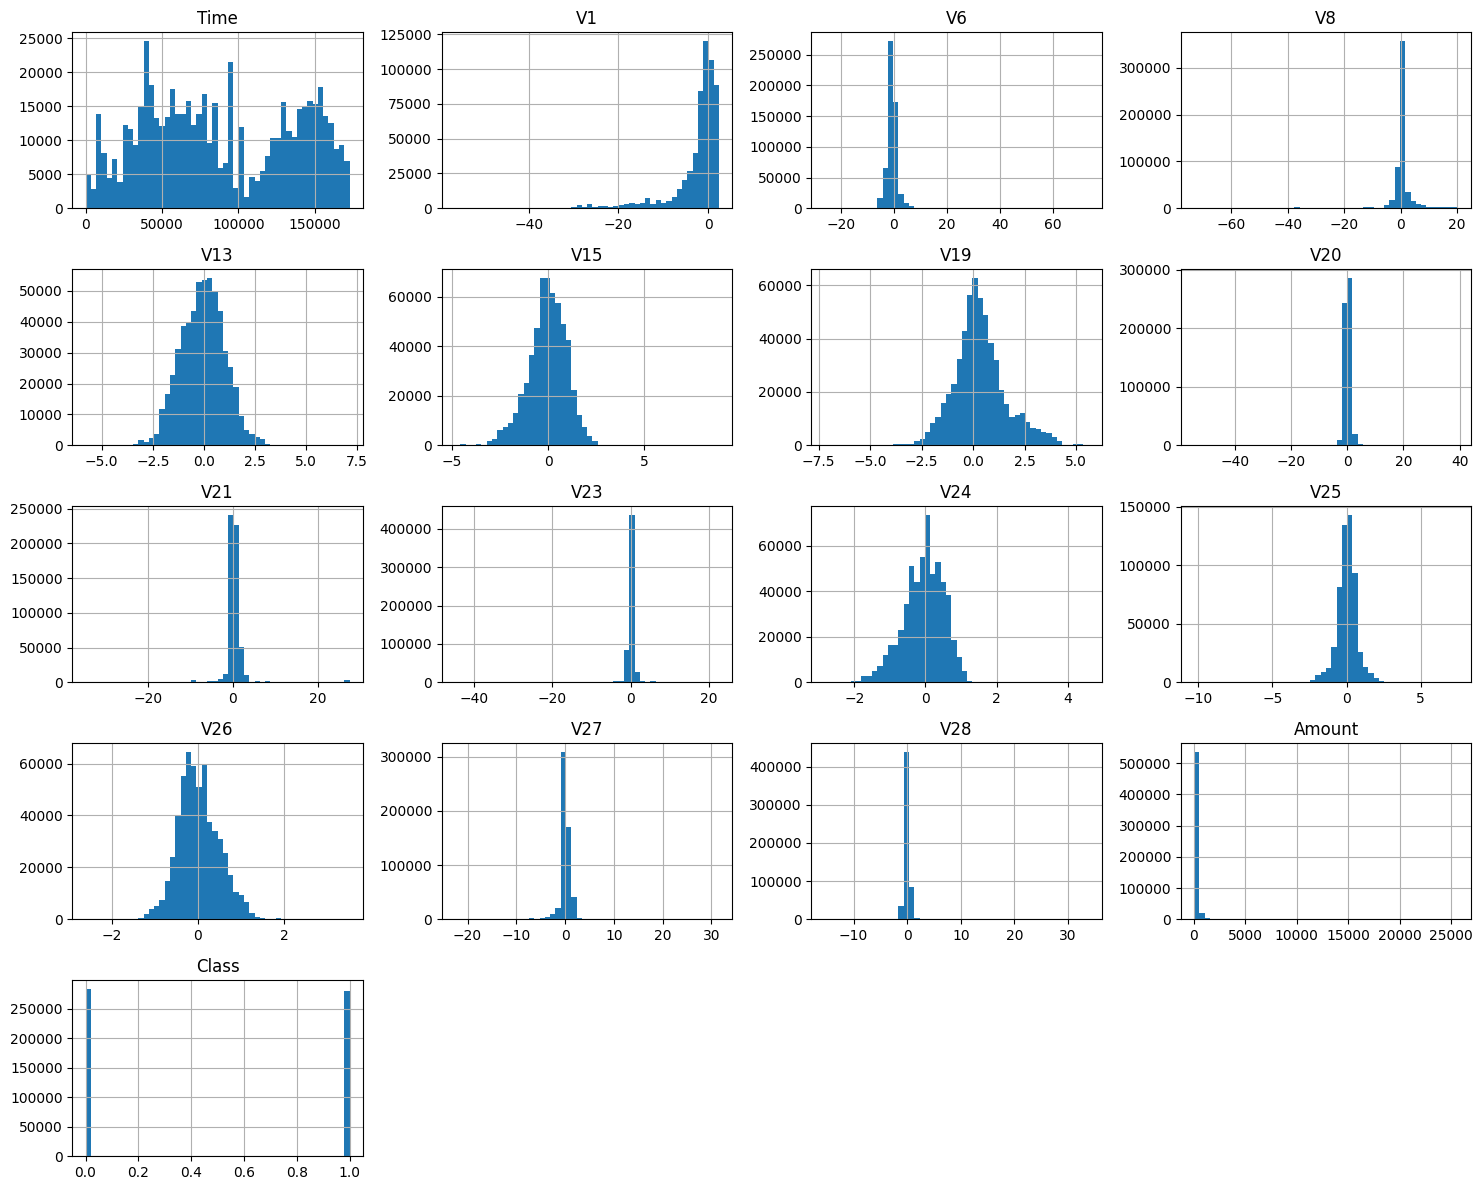

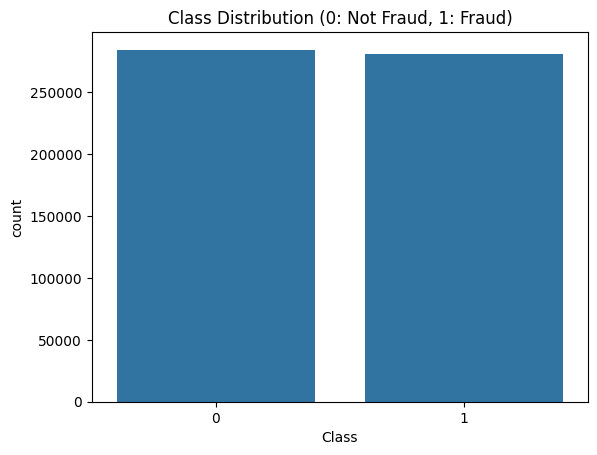

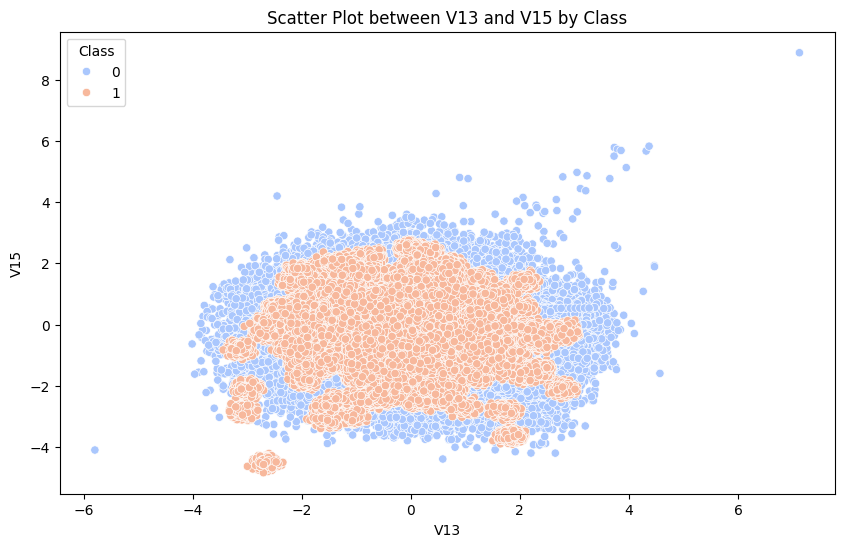

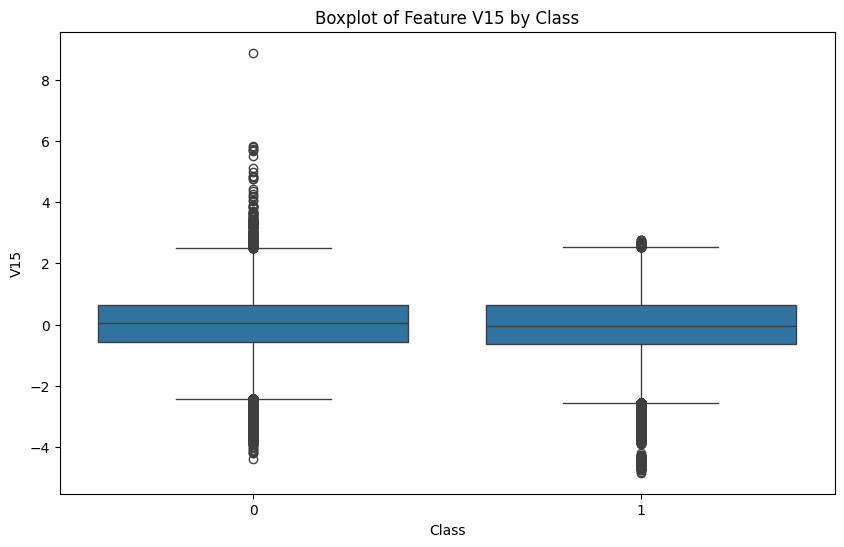

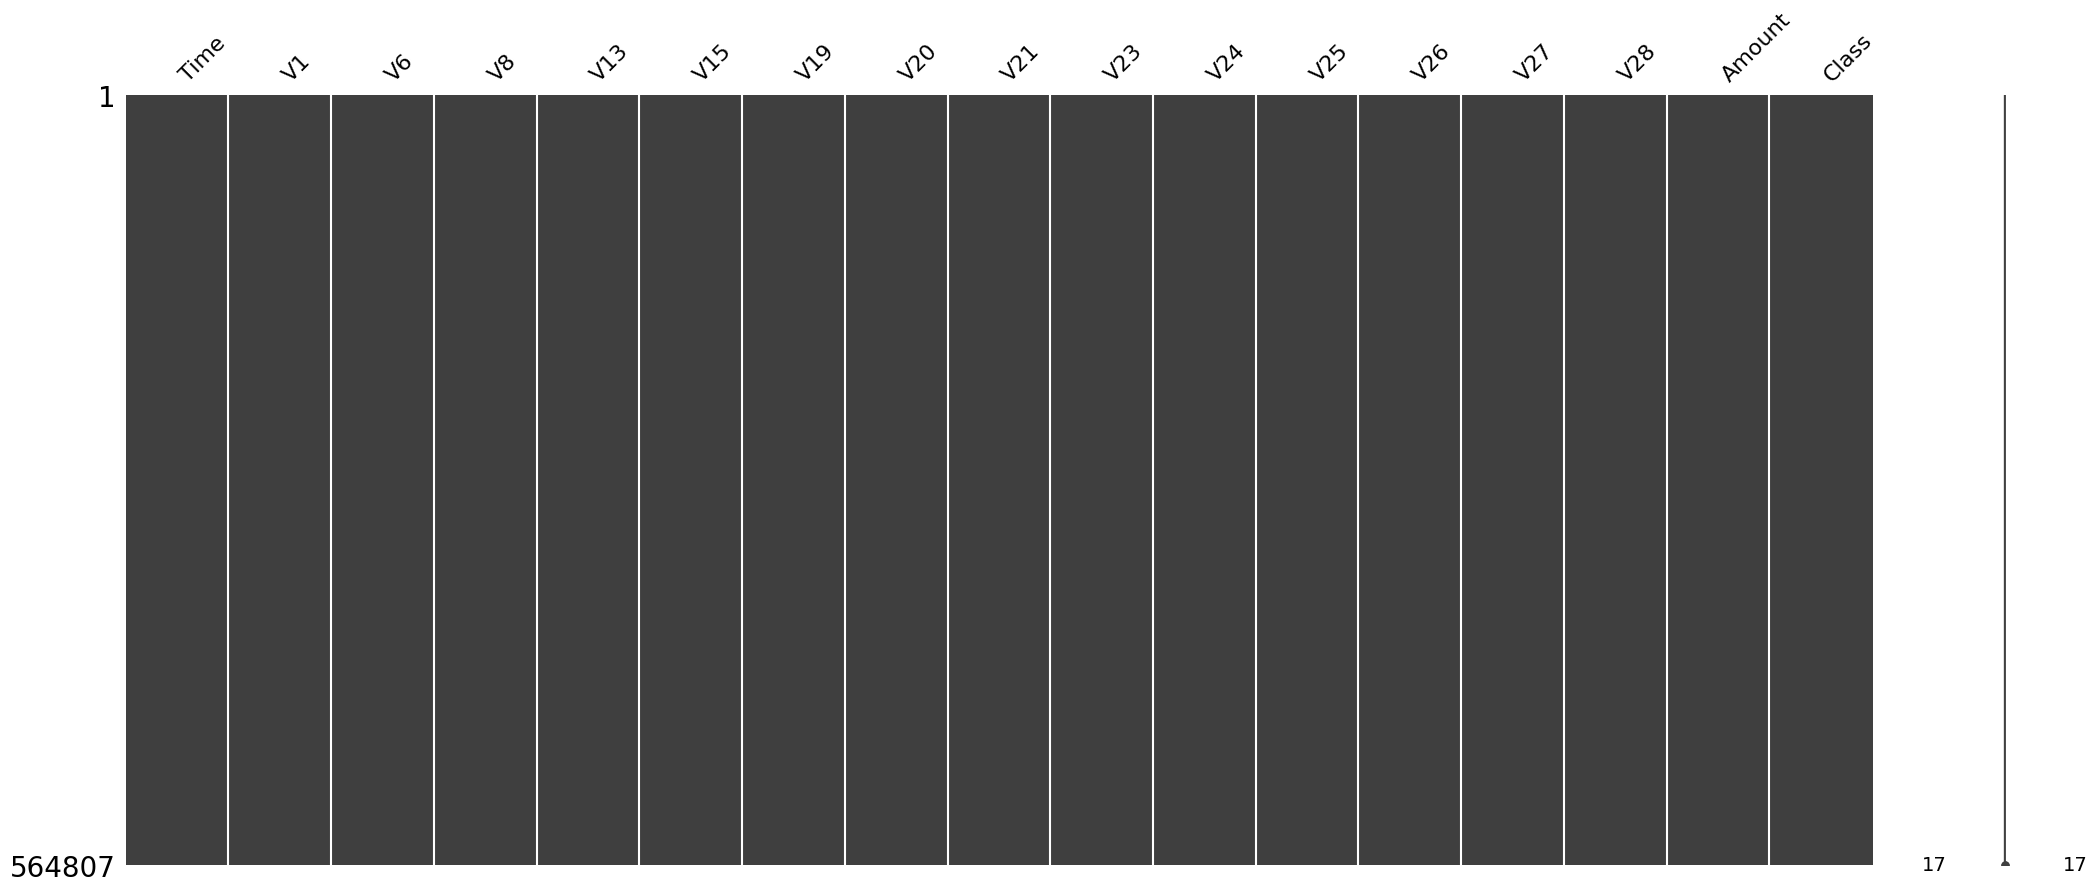

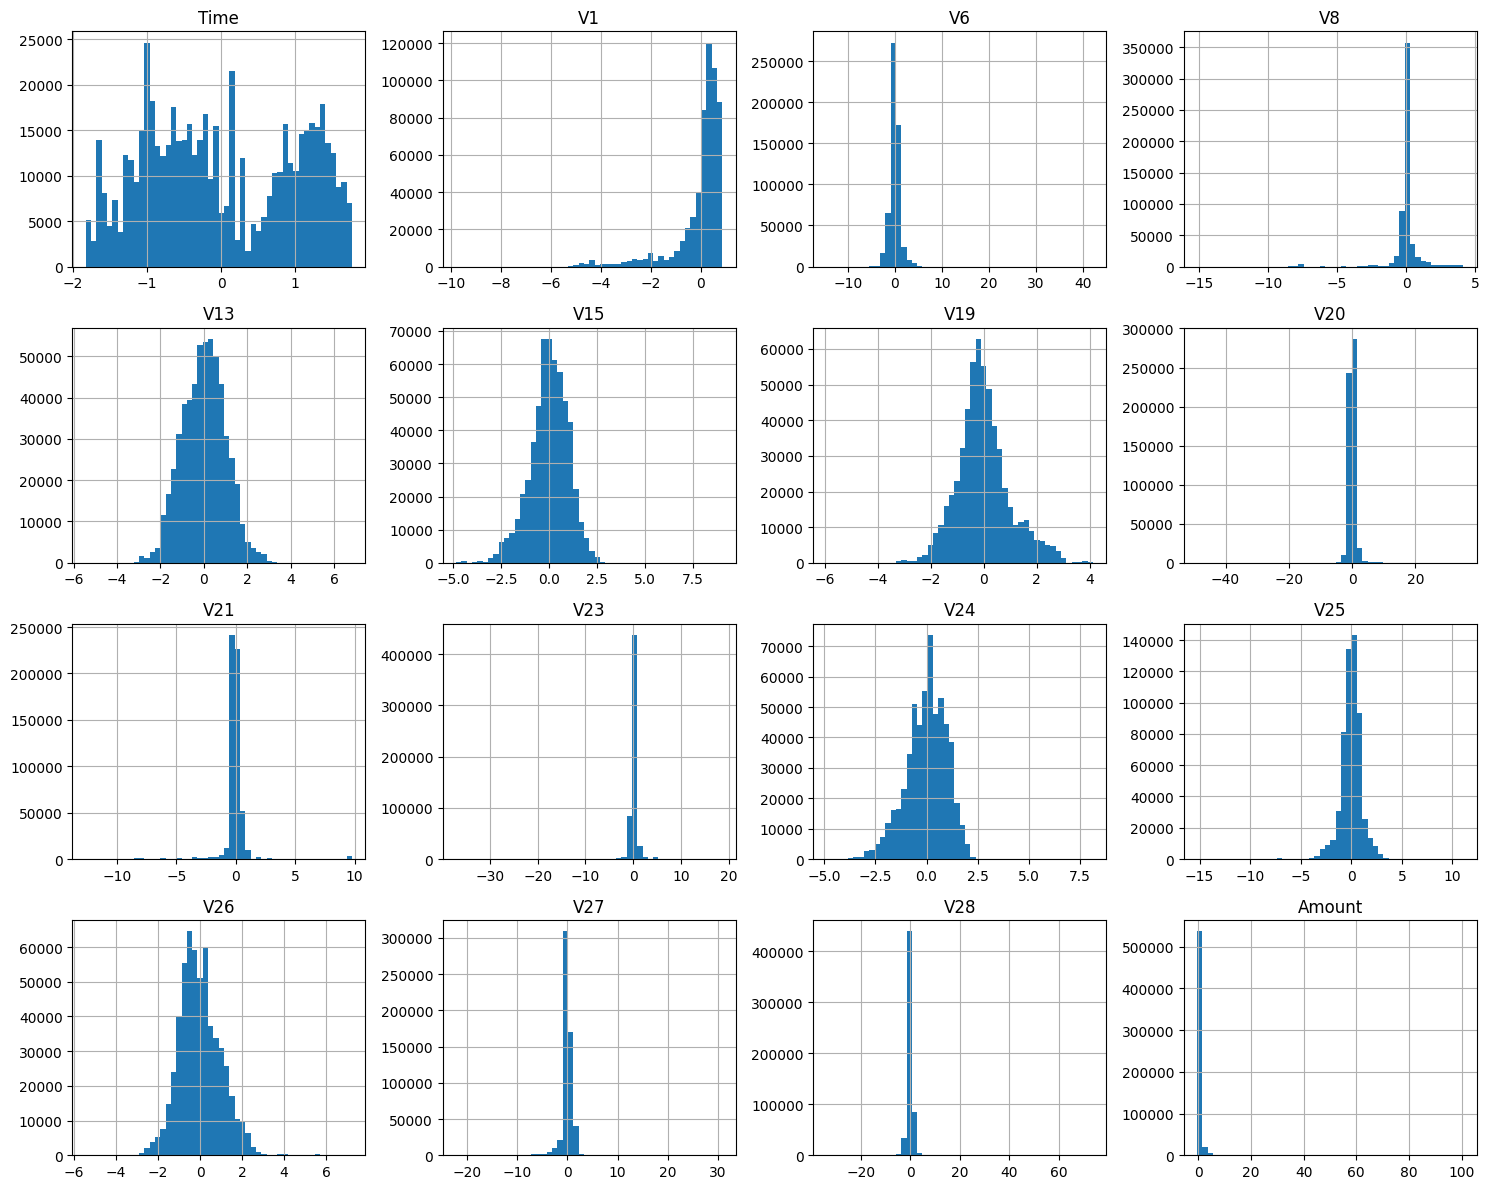

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\\Helen\\Desktop\\python\\big data\\augmented_fraud_data.csv"


df = pd.read_csv(file_path)


print(df.head())

print(df.info())

# Veri setinin temel istatistiksel özeti
print(df.describe())

# Korelasyon
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Korelasyon eşiği
threshold = 0.7
to_drop = set()

# Korelasyon matrisinin sadece üst üçgeni
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            if colname != 'Class':  
                to_drop.add(colname)


df_cleaned = df.drop(columns=to_drop)

output_file_path = r"C:\\Users\\Helen\\Documents\\GitHub\\big_data\\cleaned_fraud_data.csv"
df_cleaned.to_csv(output_file_path, index=False)

print("Korelasyonu yüksek değişkenler kaldırıldı ve yeni dosya kaydedildi: cleaned_fraud_data.csv")

# Veri setinin dağılımını görmek için histogram
df_cleaned.hist(figsize=(15, 12), bins=50)
plt.tight_layout()
plt.show()

# Hedef değişkenin (Class) dağılımı
sns.countplot(x='Class', data=df_cleaned)
plt.title('Class Distribution (0: Not Fraud, 1: Fraud)')
plt.show()

# Özellikler arasındaki ilişkiyi görmek için scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V13', y='V15', hue='Class', data=df_cleaned, palette='coolwarm')
plt.title('Scatter Plot between V13 and V15 by Class')
plt.show()

# Boxplot ile aykırı değerlerin analizi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='V15', data=df_cleaned)  # 'V1' yerine başka bir özellik de seçilebilir
plt.title('Boxplot of Feature V15 by Class')
plt.show()

# Eksik verileri görselleştirmek için missingno kullanabiliriz
import missingno as msno

# Eksik verileri görselleştir
msno.matrix(df_cleaned)
plt.show()

# Veriyi normalize etmek için Z-skoru kullanabiliriz
from sklearn.preprocessing import StandardScaler

# Z-skoru ile normalizasyon
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned.drop(columns=['Class']))

# Normalize edilmiş veriyi görselleştir
scaled_df = pd.DataFrame(scaled_features, columns=df_cleaned.columns[:-1])
scaled_df.hist(figsize=(15, 12), bins=50)
plt.tight_layout()
plt.show()
